In [71]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
!ls

LogisticRegressionSklearn.py Untitled.ipynb
Social_Network_Ads.csv


In [73]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [74]:
X = data[['Age','EstimatedSalary']]
y=data['Purchased']

In [75]:
#X['Sex_binary']=X['Gender'].map({'Male':1,'Female':0})
#X=X.drop(['Gender'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [76]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[72  4]
 [16 28]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


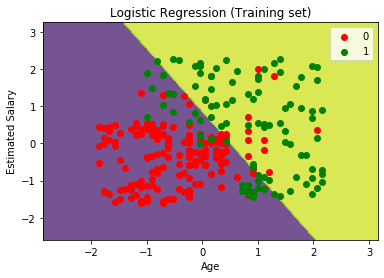

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [86]:
def plot_decision_boundry(X,y):
	X_set,y_set = X,y
	import matplotlib.pyplot as plt
	from matplotlib.colors import ListedColormap
	X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
		np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01)
		)
	plt.contour(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape),alpha=0.75)
	plt.xlim(X1.min(),X1.max())
	plt.ylim(X2.min(),X2.max())
	for i,j in enumerate(np.unique(y_set)):
		plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

	plt.title('Logistic Regression Classification Boundry')
	plt.xlabel('X Label')
	plt.ylabel('Y Label')
	plt.legend()
	plt.show()
	


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


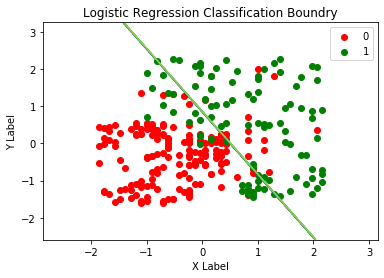

In [87]:
plot_decision_boundry(X_train,y_train)